# Explicando el efecto Dropout

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Abril de 2025

**Versión:** 1.0  

---

## Descripción

En este notebook se explica la forma de mejorar el rendimiento usando Dropout.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)
- tensorflow (2.17.1)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:

```bash
import numpy
print(numpy.__version__)
````

# Conceptos

✅ **Dropout** es una técnica de regularización que apaga aleatoriamente algunas neuronas durante el entrenamiento. Esto obliga a la red a no depender demasiado de ciertas neuronas y mejora su capacidad de generalizar, reduciendo así el sobreajuste (overfitting)

📌 **Analogía**

Imaginemos que se está formando un equipo para resolver un problema, y cada vez que se selecciona un subconjunto diferente de miembros para trabajar (¡aleatoriamente!). Esto obliga a que todos aprendan a trabajar en todo, en lugar de que solo unos pocos lo resuelvan siempre.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping # Esto es para el spoiler


# Carga de datos

In [ ]:
# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


# Normalización

In [ ]:
# Normalizar imágenes (0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Construcción y entrenamiento de modelos

In [ ]:
# Construir modelo SIN Dropout
model_sin_dropout = tf.keras.Sequential(name="red_sin_dropout")
model_sin_dropout.add(tf.keras.layers.Input(shape=(28, 28)))
model_sin_dropout.add(tf.keras.layers.Flatten())
model_sin_dropout.add(tf.keras.layers.Dense(128, activation='relu'))
model_sin_dropout.add(tf.keras.layers.Dense(10, activation='softmax'))

# Construir modelo CON Dropout
model_con_dropout = tf.keras.Sequential(name="red_con_dropout")
model_con_dropout.add(tf.keras.layers.Input(shape=(28, 28)))
model_con_dropout.add(tf.keras.layers.Flatten())
model_con_dropout.add(tf.keras.layers.Dense(128, activation='relu'))
model_con_dropout.add(tf.keras.layers.Dropout(0.5))  # Dropout aquí
model_con_dropout.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilar ambos modelos
for model in [model_sin_dropout, model_con_dropout]:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenar ambos modelos
history_sin = model_sin_dropout.fit(X_train, y_train,
                                    epochs=20,
                                    batch_size=128,
                                    validation_data=(X_test, y_test),
                                    verbose=0)

history_con = model_con_dropout.fit(X_train, y_train,
                                    epochs=20,
                                    batch_size=128,
                                    validation_data=(X_test, y_test),
                                    verbose=0)




# Resumen de los modelos

In [ ]:
model_sin_dropout.summary()

Model: "red_sin_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
model_con_dropout.summary()

Model: "red_con_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

# Gráficas de resultados

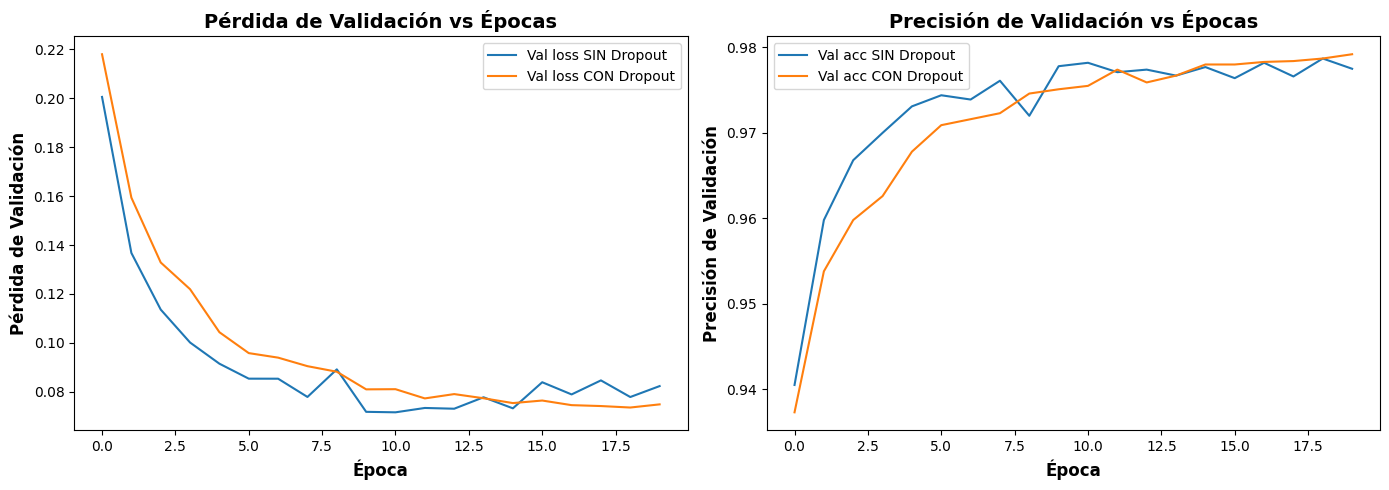

In [ ]:
# Graficar resultados
plt.figure(figsize=(14,5))

# Pérdida
plt.subplot(1,2,1)
plt.plot(history_sin.history['val_loss'], label='Val loss SIN Dropout')
plt.plot(history_con.history['val_loss'], label='Val loss CON Dropout')
plt.xlabel("Época", fontsize=12, fontweight="bold")
plt.ylabel("Pérdida de Validación", fontsize=12, fontweight="bold")
plt.title("Pérdida de Validación vs Épocas", fontsize=14, fontweight="bold")
plt.legend()

# Precisión
plt.subplot(1,2,2)
plt.plot(history_sin.history['val_accuracy'], label='Val acc SIN Dropout')
plt.plot(history_con.history['val_accuracy'], label='Val acc CON Dropout')
plt.xlabel("Época", fontsize=12, fontweight="bold")
plt.ylabel("Precisión de Validación", fontsize=12, fontweight="bold")
plt.title("Precisión de Validación vs Épocas", fontsize=14, fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

# Comentarios

✅ **Comentarios**
El modelo sin Dropout bajará mucho la pérdida de entrenamiento pero se sobreajustará, y la pérdida de validación subirá.

El modelo con Dropout tendrá mejor estabilidad en validación y mayor capacidad de generalización.

✅ **Observaciones importantes**

- ***sparse_categorial_croosentropy*** se usa cuando el problema es de multiclase y las etiquetas NO están codificadas como one-hot, sino como números enteros.





🧠 **Diferencia entre sparse_categorical_crossentropy y categorical_crossentropy**

<table>
  <tr>
    <th>Función</th>
    <th>Formato esperando de etiquetas</th>
    <th>Emeplo de y_train</th>
  </tr>
  <tr>
    <td>categorical_crossentropy</td>
    <td>One-hot-encoding (vectores binarios)</td>
    <td>[0,1,0,0,0]</td>
  </tr>
  <tr>
    <td>sparse_categorical_crossentropy</td>
    <td>Enteros (Una sola clase por muestra)</td>
    <td>2</td>
  </tr>
</table>

# ℹ Spoiler

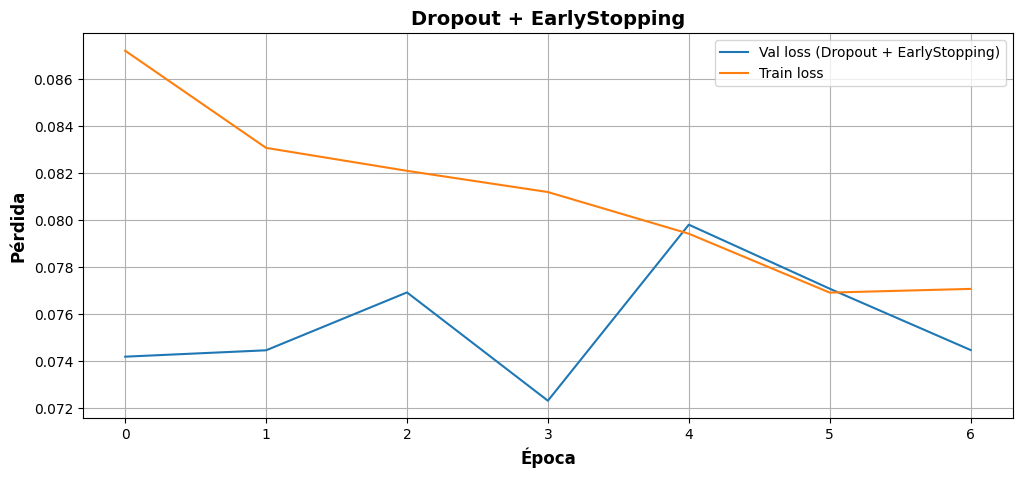

In [ ]:

early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,  # Número de épocas sin mejora antes de detener
                           restore_best_weights=True)

# Entrenamiento con EarlyStopping (ejemplo con modelo CON Dropout)
history_con_es = model_con_dropout.fit(X_train, y_train,
                                       epochs=50,
                                       batch_size=128,
                                       validation_data=(X_test, y_test),
                                       callbacks=[early_stop],
                                       verbose=0)

# Graficar entrenamiento con EarlyStopping
plt.figure(figsize=(12,5))

plt.plot(history_con_es.history['val_loss'], label='Val loss (Dropout + EarlyStopping)')
plt.plot(history_con_es.history['loss'], label='Train loss')
plt.xlabel("Época", fontsize=12, fontweight="bold")
plt.ylabel("Pérdida", fontsize=12, fontweight="bold")
plt.title("Dropout + EarlyStopping", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
history_con_es.history["accuracy"]

[0.9722499847412109,
 0.9737333059310913,
 0.9733499884605408,
 0.9738666415214539,
 0.9745000004768372,
 0.9756500124931335,
 0.9750999808311462]

📝 **Explicación didáctica**

**¿Qué es EarlyStopping?**

Es una técnica que detiene automáticamente el entrenamiento cuando la métrica de validación (ej. pérdida) deja de mejorar, ayudando a evitar el sobreentrenamiento y a reducir tiempo de entrenamiento.

**Parámetros claves:**

+ *monitor='val_loss'*: observa la pérdida de validación.

+ *patience=3*: permite 3 épocas sin mejora antes de detener.

+ *restore_best_weights=True*: se asegura de quedarse con los mejores pesos, no los de la última época.